

# 911 Calls Data Analysis Project


For this data analysis project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Analytics skills!

### Section 1: Data and Setup

____
**Import numpy and pandas**

In [3]:
import numpy as np
import pandas as pd


**Import visualization libraries and set %matplotlib inline.**

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

**Read in the csv file as a dataframe called df**

In [5]:
df = pd.read_csv('911.csv')

**Check the info() of the df**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**Check the head of df**

In [7]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Section 2: Basic Questions

**What are the top 5 zipcodes for 911 calls?**

In [8]:
# Count how many times each ZIP code appears and show the top 5
top_zipcodes = df['zip'].value_counts().head(5)

# Display the result
print(top_zipcodes)


zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64


**What are the top 5 townships (twp) for 911 calls?**

In [9]:
# Count how many times each township appears and show the top 5
top_townships = df['twp'].value_counts().head(5)

# Display the result
print(top_townships)


twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64


**Take a look at the 'title' column, how many unique title codes are there?**

In [10]:
# Count the number of unique values in the 'title' column
unique_titles = df['title'].nunique()

# Display the result
print(f"Number of unique title codes: {unique_titles}")


Number of unique title codes: 110


### Section 3: Creating new features

**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.**

**For example, if the title column value is EMS: BACK PAINS/INJURY, the Reason column value would be EMS.**

In [ ]:
# Extract the department (Reason) before the colon in the 'title' column
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

# Display the first few rows to confirm the new column
print(df[['title', 'Reason']].head())


0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Name: Reason, Length: 663522, dtype: object

**What is the most common Reason for a 911 call based off of this new column?**

In [ ]:
# Count how many times each Reason appears and display the most common one
most_common_reason = df['Reason'].value_counts().idxmax()

# Display the result
print(f"The most common reason for a 911 call is: {most_common_reason}")


EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

**Now use seaborn to create a countplot of 911 calls by Reason.**

<Axes: xlabel='Reason', ylabel='count'>

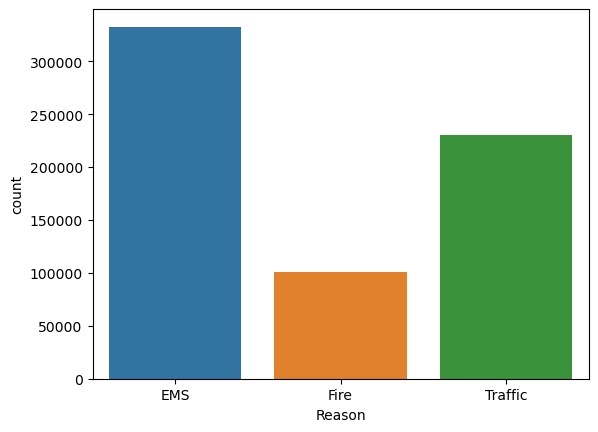

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style for better visuals (optional)
sns.set_style('whitegrid')

# Create a countplot for the 'Reason' column
sns.countplot(x='Reason', data=df)

# Set axis labels
plt.xlabel('Reason')
plt.ylabel('Count')
plt.title('911 Calls by Reason')  # Optional: Add a title

# Show the plot
plt.show()


___
**Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?**

In [ ]:
# Check the data type of the 'timeStamp' column
print(df['timeStamp'].dtype)


str

**You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.**

In [12]:
# Convert 'timeStamp' column from string to datetime format
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

# Confirm the change by checking the data type again
print(df['timeStamp'].dtype)


datetime64[ns]


**You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column.**

In [13]:
# Extract hour from timeStamp
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)

# Extract month from timeStamp
df['Month'] = df['timeStamp'].apply(lambda x: x.month)

# Extract day of week (as an integer: 0 = Monday, 6 = Sunday)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

# View first few rows to confirm
print(df[['timeStamp', 'Hour', 'Month', 'Day of Week']].head())


            timeStamp  Hour  Month  Day of Week
0 2015-12-10 17:40:00    17     12            3
1 2015-12-10 17:40:00    17     12            3
2 2015-12-10 17:40:00    17     12            3
3 2015-12-10 17:40:01    17     12            3
4 2015-12-10 17:40:01    17     12            3


**Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:**

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [14]:
# Create a dictionary to map numbers to weekday names
dmap = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

# Use .map() to apply the mapping to the 'Day of Week' column
df['Day of Week'] = df['Day of Week'].map(dmap)

# View the updated column
print(df[['timeStamp', 'Day of Week']].head())


            timeStamp Day of Week
0 2015-12-10 17:40:00         Thu
1 2015-12-10 17:40:00         Thu
2 2015-12-10 17:40:00         Thu
3 2015-12-10 17:40:01         Thu
4 2015-12-10 17:40:01         Thu


In [18]:
df['Day of Week'] = df['Day of Week'].map(dmap)


**Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'Hour', 'Month', 'Day of Week', 'Reason'],
      dtype='object')


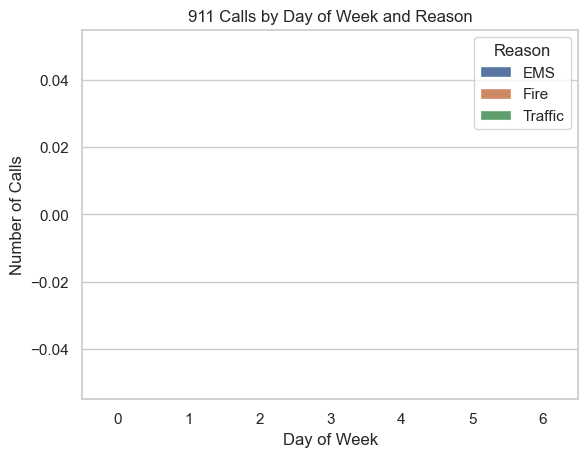

In [22]:
print(df.columns)
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

# This assumes the column names are correct now
sns.countplot(x='Day of Week', data=df, hue='Reason')

plt.xlabel('Day of Week')
plt.ylabel('Number of Calls')
plt.title('911 Calls by Day of Week and Reason')
plt.legend(title='Reason')
plt.show()




**Now do the same for Month:**

In [23]:
# Ensure these columns exist
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])
df['Month'] = df['timeStamp'].apply(lambda x: x.month)


<Axes: xlabel='Month', ylabel='count'>

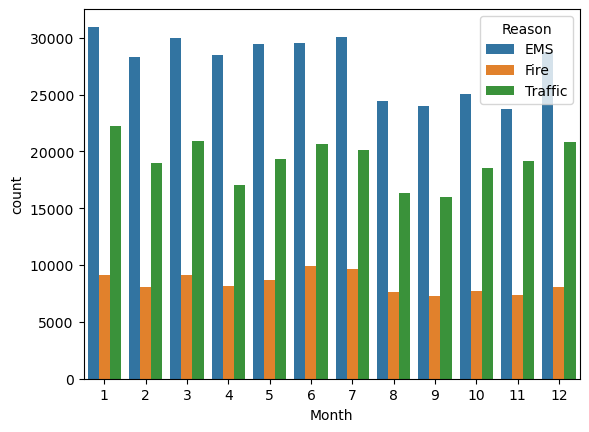

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set_style('whitegrid')

# Plot the count of 911 calls per month, grouped by Reason
sns.countplot(x='Month', data=df, hue='Reason')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.title('911 Calls by Month and Reason')
plt.legend(title='Reason')

# Display the plot
plt.show()


**Did you notice something strange about the Plot?**

_____

**You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...**

**Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.**

In [ ]:
# Group the DataFrame by the 'Month' column and count all values
byMonth = df.groupby('Month').count()

# View the first few rows
byMonth.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,DayOfWeek
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509


**Now create a simple plot off of the dataframe indicating the count of calls per month.**

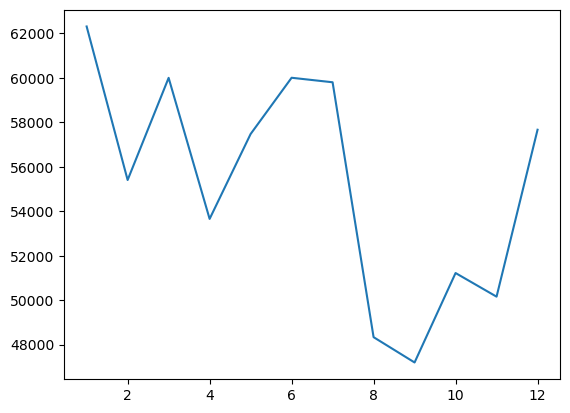

In [ ]:
byMonth = df.groupby('Month').count()
import matplotlib.pyplot as plt

# Plot number of 911 calls per month using the 'title' column as a proxy for call count
byMonth['title'].plot()

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.title('911 Calls per Month')
plt.grid(True)

# Show the plot
plt.show()



**Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.**

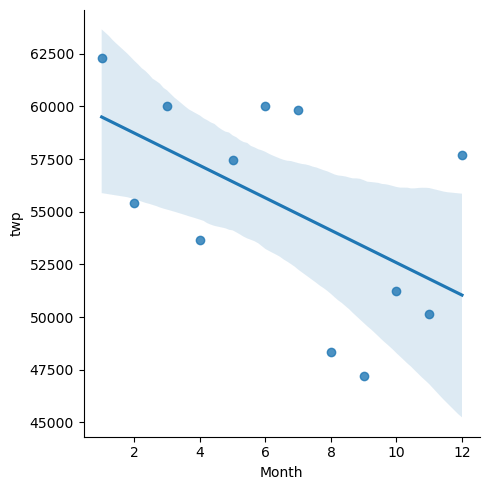

In [ ]:
# Reset index so 'Month' becomes a column
byMonth = byMonth.reset_index()
import seaborn as sns

# Create a linear model plot
sns.lmplot(x='Month', y='title', data=byMonth)

# Add title
plt.title('Linear Fit of 911 Calls per Month')
plt.xlabel('Month')
plt.ylabel('Number of Calls')

# Show the plot
plt.show()


**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.**

In [ ]:
# Extract only the date part from 'timeStamp'
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

# View the new column
print(df[['timeStamp', 'Date']].head())


0         2015-12-10
1         2015-12-10
2         2015-12-10
3         2015-12-10
4         2015-12-10
             ...    
663517    2020-07-29
663518    2020-07-29
663519    2020-07-29
663520    2020-07-29
663521    2020-07-29
Name: date, Length: 663522, dtype: object

**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

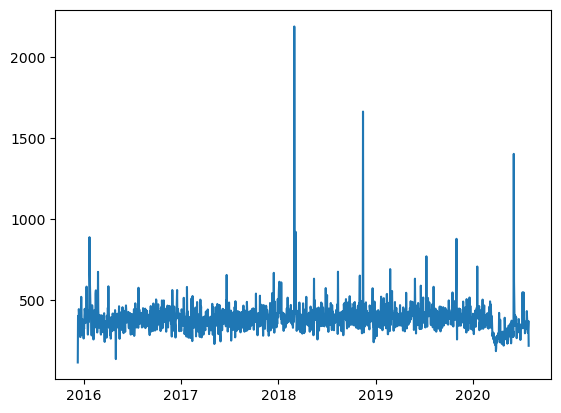

In [ ]:
# Group by Date and count the number of calls
byDate = df.groupby('Date').count()
import matplotlib.pyplot as plt

# Plot call count using the 'title' column as a proxy
byDate['title'].plot(figsize=(12, 6))

# Add labels and title
plt.title('911 Calls per Day')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.grid(True)

# Show plot
plt.show()


**Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

<Axes: xlabel='date'>

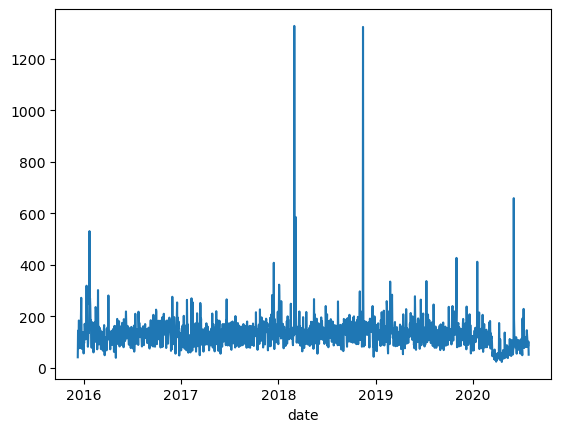

In [ ]:
# EMS calls only
df_ems = df[df['Reason'] == 'EMS']

# Fire calls only
df_fire = df[df['Reason'] == 'Fire']

# Traffic calls only
df_traffic = df[df['Reason'] == 'Traffic']



import matplotlib.pyplot as plt

# EMS plot
plt.figure(figsize=(12, 4))
ems_by_date['title'].plot()
plt.title('EMS 911 Calls per Day')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.grid(True)
plt.show()

# Fire plot
plt.figure(figsize=(12, 4))
fire_by_date['title'].plot(color='orange')
plt.title('Fire 911 Calls per Day')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.grid(True)
plt.show()

# Traffic plot
plt.figure(figsize=(12, 4))
traffic_by_date['title'].plot(color='green')
plt.title('Traffic 911 Calls per Day')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.grid(True)
plt.show()


<Axes: xlabel='date'>

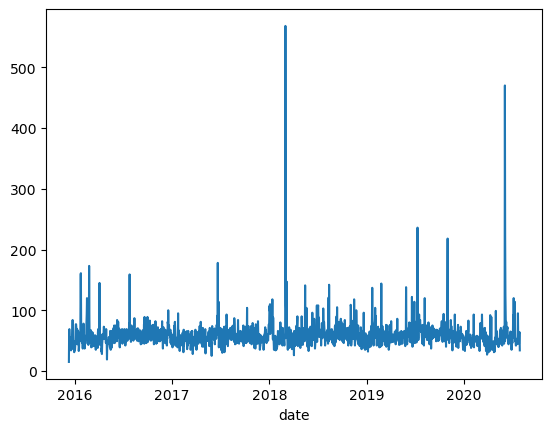

In [ ]:
# Group by Date
ems_by_date = df_ems.groupby('Date').count()
fire_by_date = df_fire.groupby('Date').count()
traffic_by_date = df_traffic.groupby('Date').count()

<Axes: xlabel='date'>

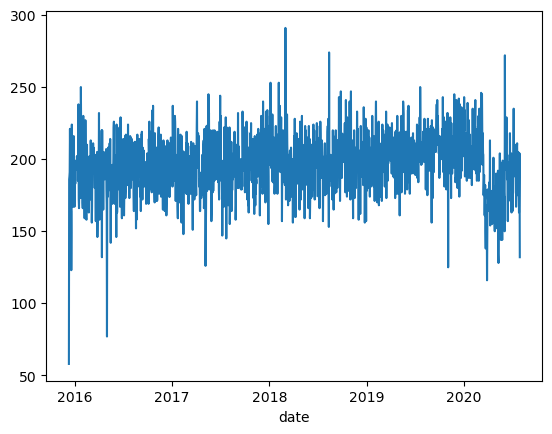

In [ ]:
import matplotlib.pyplot as plt

# EMS plot
plt.figure(figsize=(12, 4))
ems_by_date['title'].plot()
plt.title('EMS 911 Calls per Day')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.grid(True)
plt.show()

# Fire plot
plt.figure(figsize=(12, 4))
fire_by_date['title'].plot(color='orange')
plt.title('Fire 911 Calls per Day')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.grid(True)
plt.show()

# Traffic plot
plt.figure(figsize=(12, 4))
traffic_by_date['title'].plot(color='green')
plt.title('Traffic 911 Calls per Day')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.grid(True)
plt.show()


____
**Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method.**

In [ ]:
# Group by 'Day Of Week' and 'Hour' and count number of calls
day_hour = df.groupby(by=['Day Of Week', 'Hour']).count()

# Reshape so 'Hour' becomes columns
day_hour = day_hour['title'].unstack()


Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayOfWeek,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354


**Now create a HeatMap using this new DataFrame.**

<Axes: xlabel='Hour', ylabel='DayOfWeek'>

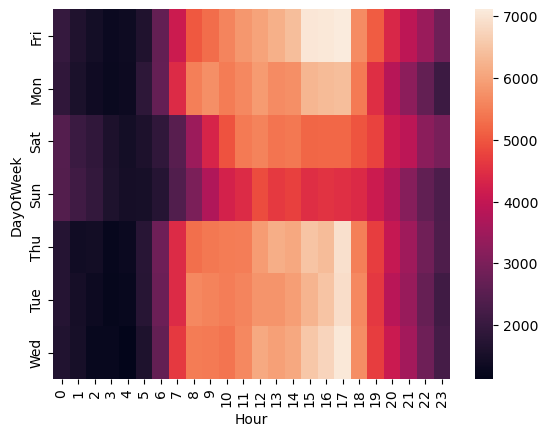

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Set figure size
sns.heatmap(day_hour, cmap='viridis', linecolor='white', linewidths=0.5)

plt.title('911 Calls Heatmap (Day of Week vs Hour)', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')

plt.show()


**Now create a clustermap using this DataFrame.**

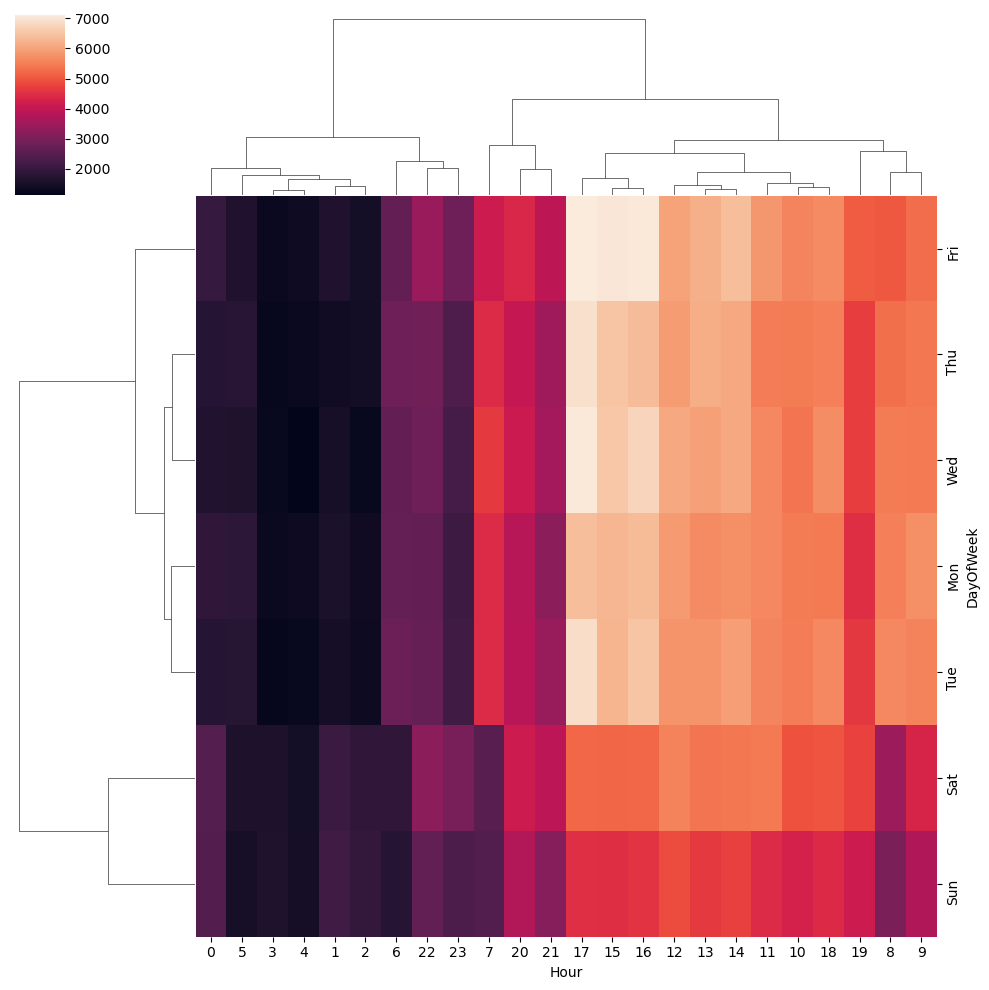

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a clustermap
sns.clustermap(day_hour, cmap='viridis', linewidths=0.5, figsize=(12, 8))

# Optional: Add a title (matplotlib only works with plt, not sns.clustermap directly)
plt.title('911 Calls Clustermap (Day of Week vs Hour)', pad=100)
plt.show()


**Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.**

In [ ]:
# Group by Day of Week and Month
day_month = df.groupby(by=['Day Of Week', 'Month']).count()

# Use only the 'title' column to represent call counts
day_month = day_month['title'].unstack()


Month,1,2,3,4,5,6,7,8,9,10,11,12
DayOfWeek,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151


<Axes: xlabel='Month', ylabel='DayOfWeek'>

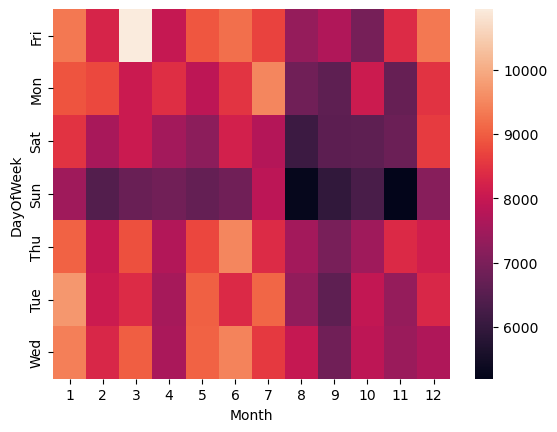

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(day_month, cmap='plasma', linecolor='white', linewidths=0.5)

plt.title('911 Calls Heatmap (Day of Week vs Month)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Day of Week')
plt.show()


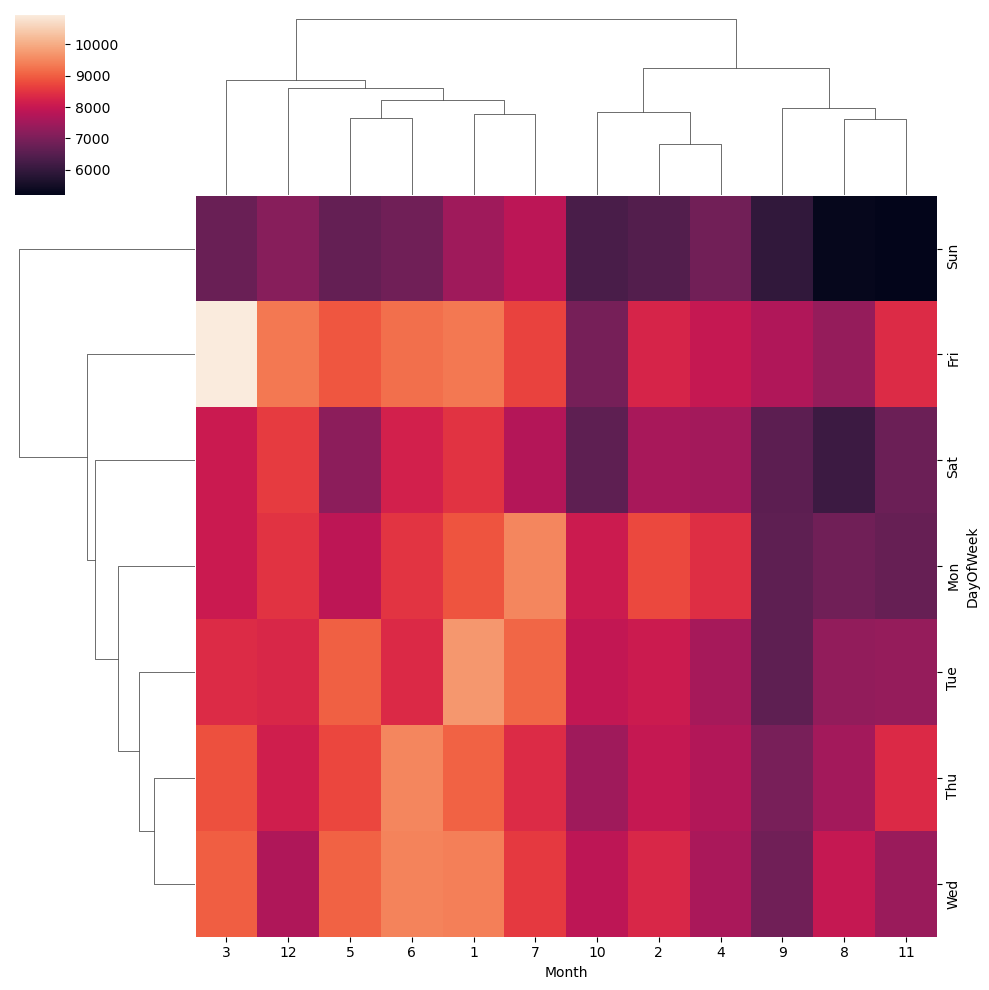

In [ ]:
# Create a clustermap
sns.clustermap(day_month, cmap='plasma', linewidths=0.5, figsize=(12, 8))

# Add a general title (matplotlib version)
plt.title('911 Calls Clustermap (Day of Week vs Month)', pad=100)
plt.show()


**Continue exploring the Data however you see fit!**
# Great Job!

## Which zip code has the highest average number of calls per day?

In [26]:
# Step 1: Make sure the 'Date' column exists
# (This assumes you have already converted 'timeStamp' to datetime format earlier)
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

# Step 2: Group by both Date and zip to count the number of calls per day per zip
calls_per_day = df.groupby(['Date', 'zip']).count()['title'].reset_index()

# Step 3: Group by zip and calculate the average number of calls per day
avg_calls_by_zip = calls_per_day.groupby('zip')['title'].mean().sort_values(ascending=False)

# Step 4: Display the top 10 ZIP codes
print("Top 10 ZIP codes by average 911 calls per day:\n")
print(avg_calls_by_zip.head(10))



Top 10 ZIP codes by average 911 calls per day:

zip
19401.0    26.945946
19464.0    25.648649
19403.0    18.813953
19446.0    18.332046
19406.0    12.254826
19002.0    11.776062
19468.0    11.589147
19454.0    10.779070
19090.0    10.252918
19038.0     9.992248
Name: title, dtype: float64


## What are the Top 10 Townships (twp) with the Most 911 Calls?


In [27]:
# Count 911 calls per township and sort in descending order
top_townships = df['twp'].value_counts().head(10)

# Display result
print("Top 10 Townships by total 911 calls:\n")
print(top_townships)


Top 10 Townships by total 911 calls:

twp
LOWER MERION        8443
ABINGTON            5977
NORRISTOWN          5890
UPPER MERION        5227
CHELTENHAM          4575
POTTSTOWN           4146
UPPER MORELAND      3434
LOWER PROVIDENCE    3225
PLYMOUTH            3158
HORSHAM             3003
Name: count, dtype: int64


## Which ZIP Codes Have the Highest Variety of Emergency Reasons?

In [29]:
# Group by zip and count the number of unique reasons per zip
zip_reason_variety = df.groupby('zip')['Reason'].nunique().sort_values(ascending=False)

# Display top ZIP codes with highest variety
print("ZIP Codes with the highest variety of emergency reasons:\n")
print(zip_reason_variety.head(10))


ZIP Codes with the highest variety of emergency reasons:

zip
19083.0    3
19118.0    3
19492.0    3
19131.0    3
19504.0    3
19128.0    3
19505.0    3
19126.0    3
19120.0    3
19512.0    3
Name: Reason, dtype: int64


## What Hour of the Day Are Different Emergency Types Most Frequent?

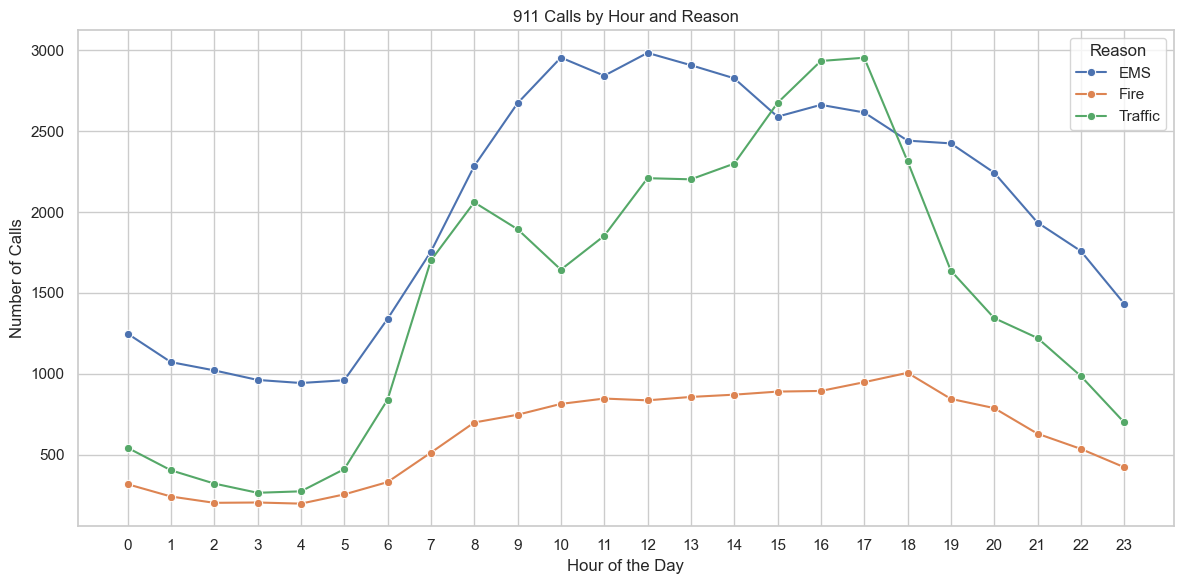

In [30]:
# Group by Reason and Hour, then count the number of calls
reason_hour = df.groupby(['Reason', 'Hour'])['title'].count().reset_index()

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=reason_hour, x='Hour', y='title', hue='Reason', marker='o')

plt.title('911 Calls by Hour and Reason')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Calls')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


## What Is the Average Call Volume per Day of Week for Each Reason?

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'Hour', 'Month', 'Day of Week', 'Reason', 'Date'],
      dtype='object')


C:\Users\ZAD\AppData\Local\Temp\ipykernel_6136\3075895241.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Reason')


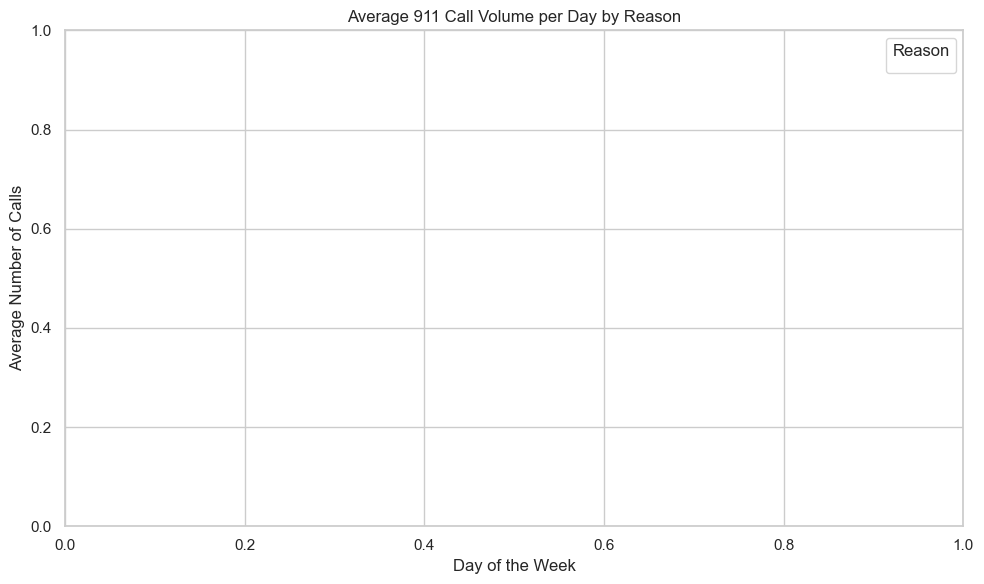

In [34]:
# Check available columns (optional, to confirm correct naming)
print(df.columns)

# Use the correct column name (likely 'Day of Week' based on earlier steps)
dow_reason_avg = df.groupby(['Day of Week', 'Reason'])['title'].count().reset_index()

# Rename for clarity
dow_reason_avg.rename(columns={'title': 'Call Count'}, inplace=True)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=dow_reason_avg, x='Day of Week', y='Call Count', hue='Reason')

plt.title('Average 911 Call Volume per Day by Reason')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Calls')
plt.legend(title='Reason')
plt.tight_layout()
plt.show()

